<a href="https://colab.research.google.com/github/hitanshu5/Image-Processing-and-Computer-Vision/blob/main/IPCVEXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

def get_pixel_frequency(image):
  pixel_frequency = np.zeros(256)
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      pixel_val = image[row][col]
      pixel_frequency[pixel_val] += 1
  return pixel_frequency

def histrogram_equalization(image):
  pixel_freq = get_pixel_frequency(image)
  pixel_pdf = pixel_freq / np.sum(pixel_freq)
  pixel_cumsum = np.cumsum(pixel_pdf)
  bits_cumsum = (255) * pixel_cumsum
  pixel_map = np.fix(bits_cumsum).astype(int)

  equalized_image = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      equalized_image[i, j] = pixel_map[image[i, j]]
  return equalized_image

def histogram_stretching(image):
  min_gray = np.min(image)
  max_gray = np.max(image)
  stretched_image = np.round((image - min_gray) /(255 * (max_gray - min_gray)))
  return stretched_image

def display_image(image, title):
  plt.imshow(image, cmap='gray')
  plt.title(title)
  plt.show()

def display_histogram(histogram1, histogram2, title1, title2):
  plt.plot(histogram1, label = title1)
  plt.plot(histogram2,label = title2)
  plt.legend()
  plt.show()

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

random_index = np.random.randint(0, len(X_test))
image = X_test[random_index]

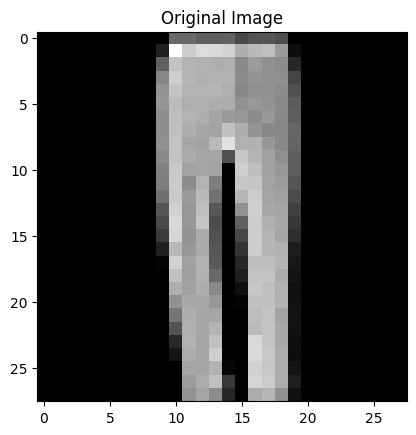

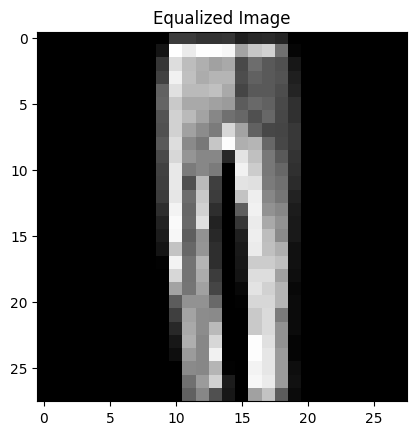

In [ ]:
display_image(image,'Original Image')

equalized_image = histrogram_equalization(image)
display_image(equalized_image,'Equalized Image')

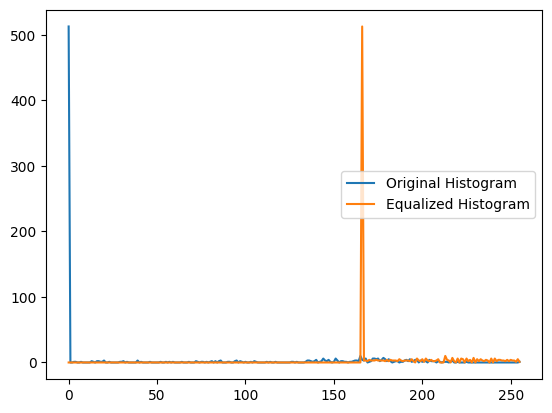

In [ ]:
original_histogram = np.histogram(image, bins=256, range=(0, 256))[0]
equalized_histogram = np.histogram(equalized_image, bins=256, range=(0, 256))[0]

display_histogram(original_histogram, equalized_histogram, 'Original Histogram', 'Equalized Histogram')

stretched_image = histogram_stretching(image)

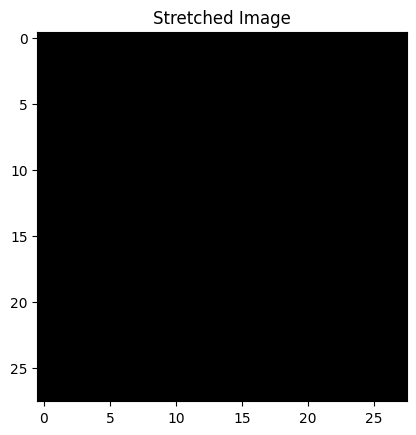

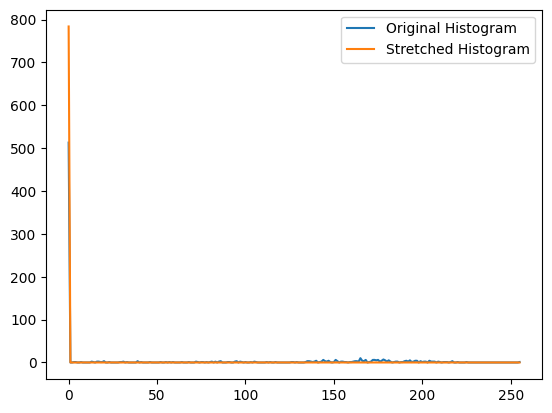

The contrast of the image increased after histogram equalization and stretching.


In [ ]:
display_image(stretched_image, 'Stretched Image')

stretched_histogram = np.histogram(stretched_image, bins=256, range=(0, 256))[0]

display_histogram(original_histogram, stretched_histogram, 'Original Histogram', 'Stretched Histogram')

print('The contrast of the image increased after histogram equalization and stretching.')

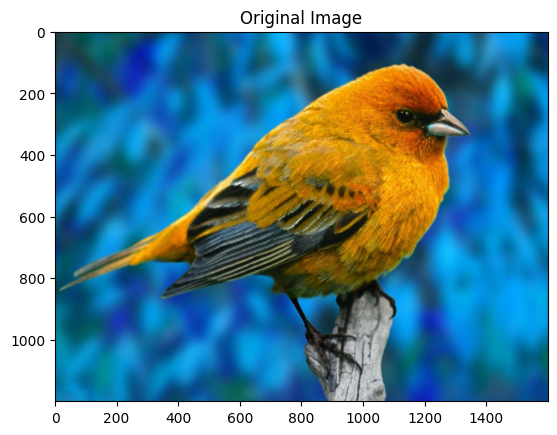

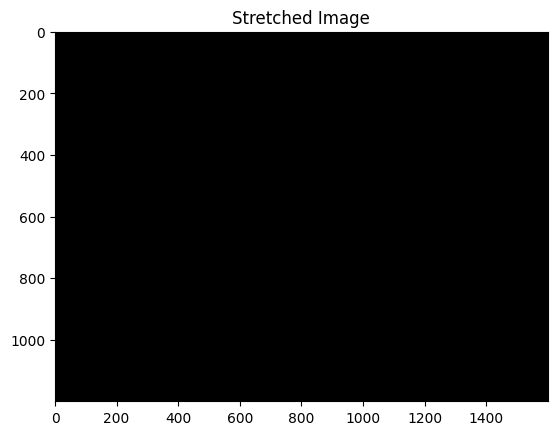

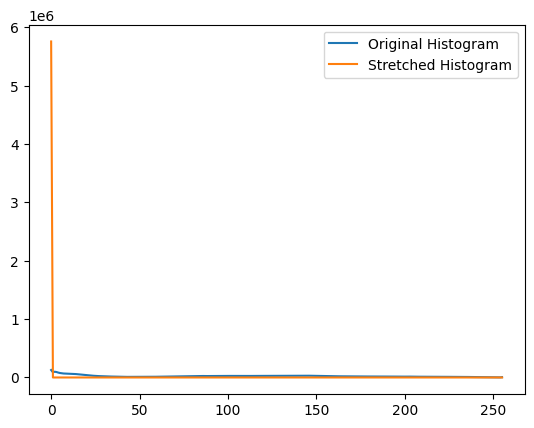

The contrast of the image increased after histogram stretching.


In [ ]:
image = cv2.imread(r'/content/Free-Bird-mobile-hd-wallpaper.jpg.crdownload')

if image is not None:
    display_image(image, 'Original Image')

    original_histogram = np.histogram(image, bins=256, range=(0, 256))[0]

    stretched_image = histogram_stretching(image)

    display_image(stretched_image, 'Stretched Image')

    stretched_histogram = np.histogram(stretched_image, bins=256, range=(0, 256))[0]

    display_histogram(original_histogram, stretched_histogram, 'Original Histogram', 'Stretched Histogram')

    print('The contrast of the image increased after histogram stretching.')
else:
    print('Error: Could not load the image. Please check the file path and try again.')